## Implementing Back-propagation Algorithm with XOR data

### XOR data: <br>
**$ x_0 \ x_1 \ y$** <br>
$0 \ \ \  0 \ \ \  0$ <br>
$0 \ \ \  1 \ \ \  1$ <br>
$1 \ \ \  0 \ \ \  1$<br>
$1 \ \ \  1 \ \ \  0$<br>

---



In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Activation function

Sigmoid function $$\frac{1}{1+ e^{-x}} $$

In [0]:
#Define our activation function

def sigmoid (x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    # YOUR CODE HERE
    return 1/(1+np.exp(-x))

In [3]:
'''Testing'''
assert sigmoid(0)==0.5
assert np.isclose(sigmoid(-2), 0.119202922, atol=0.0001)
print('Test passed', '\U0001F44D')

Test passed 👍


In [0]:
# Define the activation function derivative

def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
        y = derivative of sigmoid
    '''
    # YOUR CODE HERE
#     print(sigmoid(0)*(1-sigmoid(0)))
    return x*(1-x)

In [5]:
'''Testing code for sigmoid_derivative'''
assert sigmoid_derivative(1) == 0
assert sigmoid_derivative(0) == 0
print('Test passed', '\U0001F44D')


Test passed 👍


## Defining the model

In [0]:
#Define the NeuralNetwork class

class NeuralNetwork:
    def __init__(self, net_arch):
        '''   
        Input:
            net_arch: list of 3 integers
        Action:
            Creates instance variables:
                self.input: np array of shape (ni,1)
                self.layer1: nprarray of shape (nh,1)
                self.output: np array of shape (no,1)
                self.weights1: np array of shape (nh, ni), initialized randomly between (-1,1)
                self.weights2: np array of shape (no, nh), initialized randomly between (-1,1)
                
            NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        ni = net_arch[0]  ## Number of neurons in input layer    
        nh = net_arch[1]  ## Number of neurons in hidden layer
        no = net_arch[2]  ## Number of neurons in output layer
        
        self.ni = ni
        self.nh = nh
        self.no = no
        
        # YOUR CODE HERE
        self.input=np.random.rand(self.ni,1)   # np array of shape (ni,1)
        self.layer1= np.random.rand(self.nh,1)  # nprarray of shape (nh,1)
        self.output=np.random.rand(self.no,1) # np array of shape (no,1)
        self.weights1= 2*np.random.rand(self.nh,ni)-1 # np array of shape (nh, ni), initialized randomly between (-1,1)
        self.weights2= 2*np.random.rand(self.no,nh)-1 # np array of shape (no, nh), initialized randomly between (-1,1)
    
    def feedforward(self,x):
        '''
        Input:
            x: numpy array of shape (ni,1)
        Action:
            
        Return:
            output: numpy array of shape (no,1),
        '''
        # YOUR CODE HERE
#         hi_1=[]
#         for i in range(x.shape[0]):
#         print('x=',x)
#         print('feed x.shape=',x.shape)
#         print('self.weights1=',self.weights1.shape)
#         print('x.shape=',x.shape)

#         hi_1= self.weights1.dot(x)
#          print('hi_1.shape=',hi_1.shape)
        

#  hi_1= self.weights1.dot(x)
#         print('hi_1=',hi_1)
        x=x.reshape(-1,1)
        self.layer1 = sigmoid(np.dot(self.weights1, x)).reshape(-1, 1)
        y = sigmoid(np.dot(self.weights2, self.layer1)).reshape(-1,1)
#         print('y=',y)
        
#         print('w2=.shape=',self.weights2.shape,'    w2=',self.weights2)
#         print('w2=.shape=',self.weights1.shape,'    w2=',self.weights1)
        return y
             

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
        # Finding the derivatives
            del_weights2: np array of shape (no,nh) that stores the derivative of the loss function with respect to weights2
            del_weights1: np array of shape (nh,ni) that stores the derivative of the loss function with respect to weights1
            
        # Update the weights with the derivative of the loss function
            weights1 += eta*del_weights1
            weights2 += eta*del_weights2
        '''
   
        # YOUR CODE HERE
#         print(' back start')
#         print('back x.shape=',x.shape)
#         print('x=',x)
#         print('y=',y)
#         del_weights2 = ((y - self.output) * sigmoid_derivative(self.output)).dot(self.layer1.reshape(self.nh, 1).T)
#         del_weights1 = ((y - self.output) * sigmoid_derivative(self.output)*self.weights2.T * sigmoid_derivative(self.layer1)).dot(x.T)
#         self.weights1 += eta*del_weights1
#         self.weights2 += eta*del_weights2
        
#         print('del_weights1.shape=',del_weights1.shape)
#         print('del_weights2.shape=',del_weights2.shape)
        self.del_weights2 = np.dot(((y-self.output) * sigmoid_derivative(y)),self.layer1.reshape(-1, 1).T)
        self.del_weights1 = np.dot(((y-self.output) * sigmoid_derivative(y)*self.weights2.T * sigmoid_derivative(self.layer1)), x.reshape(1,3))
      
    
#         for s in range(X.shape[0]):
#           print('s=',s)
#           print('Y.shape=',Y.shape)
#           print('self.output.shape=',self.output.shape)

#           del_weights2 = np.dot(((Y[s] - self.output) * sigmoid_derivative(self.output)),self.layer1.reshape(-1, 1).T)
#           del_weights1 = np.dot(((Y[s]-self.output) * sigmoid_derivative(self.output)*self.weights2.T * sigmoid_derivative(self.layer1)), X[s].reshape(1,-1))  
          
#           self.weights1=  del_weights1+ eta*del_weights1
#           self.weights2 =  del_weights2 + eta*del_weights2
          
# #           print('self.del_weights1=',del_weights1)
#           print('self.del_weights1.shape=',del_weights1.shape)
# #           print('self.del_weights2=',del_weights2)
#           print('self.del_weights2.shape=',del_weights2.shape)
#           print('self.weights1.shape=',self.weights1.shape)
#           print('self.weights2.shape=',self.weights2.shape)

    def fit(self, X, Y, eta, epochs):
        '''
        input:
        X: training input data of shape (4,2)
        Y: training output of shape (4,1)
        eta: learning rate
        epochs: number of epochs
        Action:
        # Modify the input by adding ones of shape(4,1) 
        # Set up the feed-forward propagation for the modified input   
        # Set up the back-propagation of the error to adjust the weights
        '''
        # YOUR CODE HERE
        add1col= lambda x: np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
#         self.input=add1col(X)
         
        X=add1col(X)
        print('X afer add1col=',X)
        for epochs in range(5000):
          for s in range(X.shape[0]):
            self.output=self.feedforward(X[s])
            self.backprop(X[s],Y[s],eta)
            self.weights1 = self.weights1 + eta*self.del_weights1
            self.weights2 = self.weights2 + eta*self.del_weights2
    def predict(self,x,y):
        '''
        # Predict function is used to check the prediction result of the neural network
        Input:
        x: single input data of shape (1,3)
        y: single output data of shape (1,1)
        Action
        pred_out: predict the output based on the model using feedforward
        
        Output
        error: y - pred_out
        
        
        '''
        # YOUR CODE HERE
#         add1col= lambda x: np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
# #         self.input=add1col(X)
         
#         x=add1col(x)
        print(x.shape)
        x=x.reshape(-1,3)
        error = 0
#         self.fit(x,y,1,100)
        for s in range(x.shape[0]):
          self.output=self.feedforward(x[s].reshape(-1,3))
    
#           print('x:',x[s,:-1],' y:',self.output)
          error += (y - self.output).dot(y - self.output)

#         print('error:',error/4)     
        return(error)
        

In [147]:
'''Testing code for __init__'''

net_arch = [3,4,1]
nn1 = NeuralNetwork(net_arch)
assert nn1.input.shape==(3,1)
assert nn1.layer1.shape == (4,1)
assert nn1.output.shape == (1,1)
assert np.all(nn1.weights1 < 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [148]:
'''Testing code for feedforward'''

def feedforward_original(nn1,x):
    assert x.shape == (nn1.ni, 1)
    layer1 = sigmoid(np.dot(nn1.weights1, x))
    output = sigmoid(np.dot(nn1.weights2, layer1))
    return output
x = np.array([0,1,1]).reshape(-1, 1)
assert nn1.feedforward(x) == feedforward_original(nn1, x)
print('Test passed', '\U0001F44D')

Test passed 👍


In [149]:
'''Testing code for backprop'''
def backprop_original(nn1,x,y,eta):
    weights1 = nn1.weights1
    weights2 = nn1.weights2
    del_weights2 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)),nn1.layer1.reshape(-1, 1).T)
    del_weights1 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)*nn1.weights2.T * sigmoid_derivative(nn1.layer1)), x.T)

    # update the weights with the derivative (slope) of the loss function
    weights1 += eta*del_weights1
    weights2 += eta*del_weights2
    return(weights1, weights2)

x = np.array([0,1,1]).reshape(-1, 1)
y = np.array([[0],])
eta = 1
nn1.backprop(x, y, eta)
w1, w2 = backprop_original(nn1, x, y, eta) 
assert np.all(np.isclose(w1, nn1.weights1))
assert np.all(np.isclose(w2, nn1.weights2))
print('Test passed', '\U0001F44D')

Test passed 👍


## Fitting the data (Training)

In [150]:
## CHECK THE PERFORMANCE
'''
Input:
# Set the input data
X = ([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = ([[0.1], [0.9], 
                 [0.9], [0.1]])
Action:
# Initialize the NeuralNetwork with
# 3 input neurons
# 4 hidden neurons
# 1 output neuron

# Fit the datas
'''
# YOUR CODE HERE


'\nInput:\n# Set the input data\nX = ([[0.1, 0.1], [0.1, 0.9],\n                [0.9, 0.1], [0.9, 0.9]])\n# Set the labels, the correct results for the xor operation\nY = ([[0.1], [0.9], \n                 [0.9], [0.1]])\nAction:\n# Initialize the NeuralNetwork with\n# 3 input neurons\n# 4 hidden neurons\n# 1 output neuron\n\n# Fit the datas\n'

In [151]:
'''Testing for fit'''
X = np.array([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = np.array([[0.1], [0.9], 
                 [0.9], [0.1]])
nn1.fit(X,Y,1,100)
x = np.array([1,1,1]).reshape(-1, 1)
y = np.array([[0],])
print(nn1.feedforward(x),y)
assert np.all(np.isclose(nn1.feedforward(x),y,atol=0.1))
print('Test passed', '\U0001F44D')

X afer add1col= [[0.1 0.1 1. ]
 [0.1 0.9 1. ]
 [0.9 0.1 1. ]
 [0.9 0.9 1. ]]
[[0.07222689]] [[0]]
Test passed 👍


## Plotting 

In [0]:
def plotting(X, Y):
  x_plot = X.T
  color = []
  for i in Y:
    if i[0] == 0:
      color.append('g')
    else:
      color.append('r')
  color = np.array(color)
  print(x_plot)
  plt.figure()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.scatter(x_plot[0],x_plot[1],color=color)
  plt.show()

[[0.1 0.1 0.9 0.9]
 [0.1 0.9 0.1 0.9]]


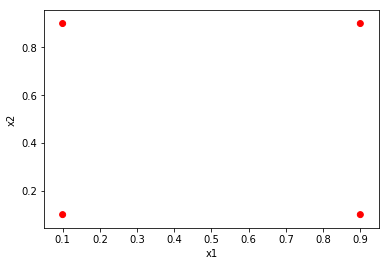

In [153]:
plotting(X, Y)

## Could you test it now?

Find the error between the predicted output and the desired output.

In [0]:
def testing(X, Y):
  ones = 0.9*np.ones((X.shape[0],1))
  x_test = np.concatenate([ones, X], axis=1)
  y_test = Y

  for k in range(4):
    print(nn.predict(x_test[k].reshape(-1, 1),y_test[k]))
    

In [155]:
'''Testing the prediction'''
x = np.array([0.9,0.9,0.9]).reshape(-1, 1)
y = np.array([[0.1],])

assert np.all(np.isclose(nn1.predict(x,y),0, atol=0.01))
print('Test passed', '\U0001F44D')

(3, 1)
Test passed 👍


# Advanced
## Does the performance increase with increasing the number of neurons in the hidden layer?
- Repeat the training with 1 neuron in the hidden layer, then with 3 neuron and then with 5 neuron in the hidden layer to see the trend in performance
- Compare the training error
- Compare the testing error